In [22]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import model_from_json

In [5]:
data_dir = r'D:\TB_Chest_Radiography_Database'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/TB_Chest_Radiography_Database')

In [7]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

6900


In [8]:
data = {
    'normal': list(data_dir.glob('n1/*')),
    'tb': list(data_dir.glob('tb1/*')),
}

labels = {
    'normal': 0,
    'tb': 1
}

In [9]:
X=[]
y=[]
for label, images in data.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(250,250))
        X.append(resized_img)
        y.append(labels[label])

X = np.array(X)
y = np.array(y)

In [10]:
print(X.shape)
print(y.shape)

(2700, 250, 250, 3)
(2700,)


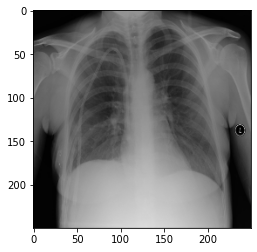

In [11]:
plt.imshow(X[0])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10)

In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [14]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(1890, 250, 250, 3)
(810, 250, 250, 3)


In [44]:
num_classes=2

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)              

Epoch 1/10
44/44 [==============================] - 52s 1s/step - loss: 0.3431 - accuracy: 0.8550
Epoch 2/10
44/44 [==============================] - 49s 1s/step - loss: 0.0895 - accuracy: 0.9636
Epoch 3/10
44/44 [==============================] - 50s 1s/step - loss: 0.0717 - accuracy: 0.9700
Epoch 4/10
44/44 [==============================] - 50s 1s/step - loss: 0.0776 - accuracy: 0.9707
Epoch 5/10
44/44 [==============================] - 57s 1s/step - loss: 0.0277 - accuracy: 0.9907
Epoch 6/10
44/44 [==============================] - 55s 1s/step - loss: 0.0459 - accuracy: 0.9864
Epoch 7/10
44/44 [==============================] - 49s 1s/step - loss: 0.0191 - accuracy: 0.9921
Epoch 8/10
44/44 [==============================] - 52s 1s/step - loss: 0.0081 - accuracy: 0.9979
Epoch 9/10
44/44 [==============================] - 51s 1s/step - loss: 0.0032 - accuracy: 1.0000
Epoch 10/10
44/44 [==============================] - 46s 1s/step - loss: 0.0014 - accuracy: 1.0000


In [45]:
model.evaluate(X_test_scaled,y_test)

19/19 [==============================] - 6s 299ms/step - loss: 0.1214 - accuracy: 0.9783


[0.12142229825258255, 0.9783333539962769]

In [51]:
pred = model.predict(X_test)

pred_y = np.argmax(pred, axis=1)
confusion_matrix(y_test, pred_y)

array([[386,   4],
       [ 46, 164]], dtype=int64)

In [15]:
aug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.25,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="constant")
total = 0

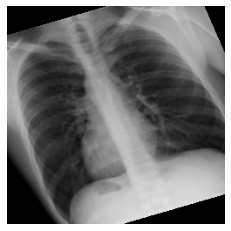

In [16]:
plt.axis('off')
plt.imshow(aug.flow(X)[0][0].astype('uint8'))

In [25]:
num_classes = 2

m1 = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(250, 250,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(250, 250,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(250, 250,3)),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

m1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
R=m1.fit(aug.flow(X_train_scaled, y_train, batch_size=32),epochs=11)    

Epoch 1/11
60/60 [==============================] - 141s 2s/step - loss: 0.6621 - accuracy: 0.7323
Epoch 2/11
60/60 [==============================] - 138s 2s/step - loss: 0.3462 - accuracy: 0.8444
Epoch 3/11
60/60 [==============================] - 133s 2s/step - loss: 0.2734 - accuracy: 0.8815
Epoch 4/11
60/60 [==============================] - 134s 2s/step - loss: 0.2161 - accuracy: 0.9095
Epoch 5/11
60/60 [==============================] - 133s 2s/step - loss: 0.2080 - accuracy: 0.9222
Epoch 6/11
60/60 [==============================] - 134s 2s/step - loss: 0.1885 - accuracy: 0.9206
Epoch 7/11
60/60 [==============================] - 134s 2s/step - loss: 0.1984 - accuracy: 0.9169
Epoch 8/11
60/60 [==============================] - 133s 2s/step - loss: 0.1784 - accuracy: 0.9286
Epoch 9/11
60/60 [==============================] - 134s 2s/step - loss: 0.1698 - accuracy: 0.9370
Epoch 10/11
60/60 [==============================] - 135s 2s/step - loss: 0.1635 - accuracy: 0.9413
Epoch 11/

In [ ]:
#imageGen = aug.flow(X_train_scaled, batch_size=1, save_to_dir=args["output"],save_prefix="image", save_format="png")

In [26]:
m1.evaluate(X_test_scaled,y_test)

26/26 [==============================] - 17s 604ms/step - loss: 0.1397 - accuracy: 0.9531


[0.13966692984104156, 0.9530864357948303]

In [27]:
m1.save('tb_model.h5')

In [39]:
m = keras.models.load_model('tb_model.h5')

pred = m.predict(X_test_scaled)

pred_y = np.argmax(pred, axis=1)
confusion_matrix(y_test, pred_y)

array([[596,   4],
       [ 34, 176]], dtype=int64)

In [36]:
for i in range(len(pred_y)):
    if pred_y[i]==0:
        if y_test[i]==0:
            print('Actual:Normal             Predicted: Normal')
        else:
            print('Actual:Tuberculosis       Predicted: Normal             "Wrong prediction"')
    if pred_y[i]==1:
        if y_test[i]==0:
            print('Actual:Normal             Predicted: Tuberculosis')
        else:
            print('Actual:Tuberculosis       Predicted: Tuberculosis       "Wrong prediction"')


Actual:Normal             Predicted: Normal
Actual:Normal             Predicted: Normal
Actual:Tuberculosis       Predicted: Tuberculosis       "Wrong prediction"
Actual:Tuberculosis       Predicted: Tuberculosis       "Wrong prediction"
Actual:Normal             Predicted: Normal
Actual:Normal             Predicted: Normal
Actual:Normal             Predicted: Normal
Actual:Normal             Predicted: Normal
Actual:Tuberculosis       Predicted: Tuberculosis       "Wrong prediction"
Actual:Normal             Predicted: Normal
Actual:Normal             Predicted: Normal
Actual:Tuberculosis       Predicted: Tuberculosis       "Wrong prediction"
Actual:Normal             Predicted: Normal
Actual:Normal             Predicted: Normal
Actual:Normal             Predicted: Normal
Actual:Tuberculosis       Predicted: Tuberculosis       "Wrong prediction"
Actual:Normal             Predicted: Normal
Actual:Normal             Predicted: Normal
Actual:Normal             Predicted: Normal
Actual:No

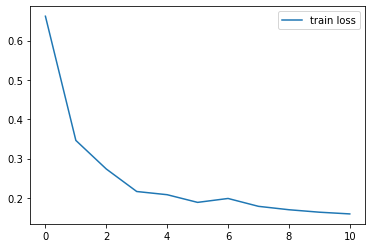

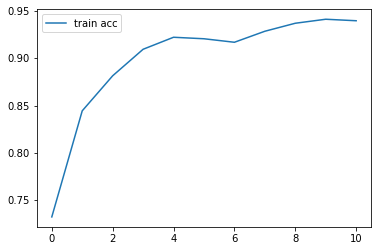

In [37]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.legend()
plt.show()

In [54]:
classification_report(y_test, pred_y, target_names=['Normal','Tuberculosis'])

              precision    recall  f1-score   support

      Normal       0.99      0.89      0.94       600
Tuberculosis       0.75      0.96      0.85       210

    accuracy                           0.91       810
   macro avg       0.87      0.93      0.89       810
weighted avg       0.93      0.91      0.91       810

